<a href="https://colab.research.google.com/github/NatalyaZab/LR_Python/blob/main/2_%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82%22%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%E2%84%963_%D0%97%D0%B0%D0%B1%D0%BE%D1%80%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D0%A1%D0%98%D0%98_12%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
# Чтение файлов.
# импортируем модуль os
import os
# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk('/content/'):
# во вложенном цикле проходимся по названиям файлов
    for filename in filenames:
# и соединяем путь до папок и входящие в эти папки файлы
# с помощью метода path.join()
        print(os.path.join(dirpath, filename))

/content/diabetes.csv
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/logs/2022.11.17/14.31.33.306783.log
/content/.config/logs/2022.11.17/14.30.36.800495.log
/content/.config/logs/2022.11.17/14.31.24.464472.log
/content/.config/logs/2022.11.17/14.31.56.476878.log
/content/.config/logs/2022.11.17/14.31.02.573135.log
/content/.config/logs/2022.11.17/14.31.55.730438.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv


In [3]:
# передадим функции open() адрес файла
# параметр 'r' означает, что мы хотим прочитать (read) файл
f1 = open('/content/diabetes.csv', 'r')
# метод .read() помещает весь файл в одну строку
# выведем первые 142 символа (если параметр не указывать, выведется все содержимое)
print(f1.read(142))
# в конце файл необходимо закрыть
f1.close()



Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26


In [4]:
# 2. кроме метода read() можно прочитать файл с помощью цикла
# снова откроем файл
f2 = open('/content/diabetes.csv', 'r')
# пройдемся по нашему объекту в цикле for и параллельно создадим индекс
for i, line in enumerate(f2):
# выведем строки без служебных символов по краям
    print(line.strip())
    # дойдя до четвертой строки, прервемся
    if i == 3:
        break
# не забудем закрыть файл
f2.close()


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


In [5]:
# 3. Еще 1 способ использовать конструкцию with open()
# скажем Питону: "открой файл и назови его f3"
with open('/content/diabetes.csv', 'r') as f3:
# "пройдись по строкам без служебных символов"
    for i, line in enumerate(f3):
        print(line.strip())
# и "прервись на четвертой строке"
        if i == 3:
            break

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


In [7]:
# применим функцию read_csv() и посмотрим на первые три записи файла diabetes.csv
# данные запишем в переменную 
diabet = pd.read_csv('/content/diabetes.csv')
diabet.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [8]:
# Этап 3. Построение модели и прогноз
# посмотрим на составляющие датасета
diabet.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
diabet.nunique() #посмотрим количество уникальных значений в переменных
# по количеству уникальных переменных можно сделать вывод, что категориальная переменная 1 - целевая (Outcome)

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Графичекий анализ данных

Text(0.5, 1.0, 'Распределение глюкозы для больных диабетом и здоровых')

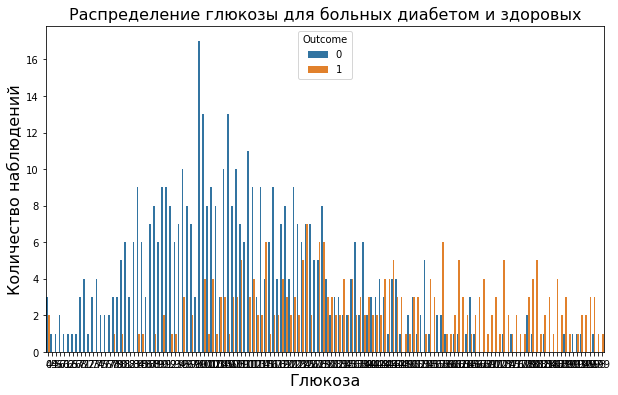

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
# Посмотрим, на сколько влияет значение глюкозы на наличие заболевания
sns.countplot(x = 'Glucose', hue = 'Outcome', data = diabet)
plt.xlabel('Глюкоза', fontsize = 16)
plt.ylabel('Количество наблюдений', fontsize = 16)
plt.title('Распределение глюкозы для больных диабетом и здоровых', fontsize = 16)

Мы видим, что у людей, имеющих заболевание, уровень глюкозы выше. Очевидно, показатель глюкозы имеет значение.

In [15]:
# преобразуем данные в  датафрейм
# присвоим датафрейму переменную
diabet_df = pd.DataFrame(diabet, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
# посмотрим на первые пять наблюдений
diabet_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# расшифруем 0 и 1 в значениях целевой переменной
# для этого посчитаем сколько раз встречается 0 и сколько раз встречается 1
unique, counts = np.unique(diabet.Outcome, return_counts = True)
unique, counts

(array([0, 1]), array([500, 268]))

In [16]:
# Посмотрим на основные статистические показатели (summary statistics):
# для этого воспользуемся методом .describe() и округлим значения
diabet_df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [17]:
# посмотрим на пропущенные значения
# Если в наборе данных пропущен существенный процент значений, то мы не сможем построить корректную модель
# воспользуемся функциями isnull() и sum()
diabet_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
diabet_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
# поместим в X все кроме столбца Outcome
X = diabet_df.drop('Outcome', axis = 1)

# а в переменную y запишем классы
y = diabet_df['Outcome']

In [20]:
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split
 
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
X_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24


Нормализация данных

In [21]:
# приведем все независимые переменные к единому масштабу

# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler_train = StandardScaler()

# приведем данные к единому масштабу 
diabet_train = scaler_train.fit_transform(X_train)

# на выходе получается массив Numpy
type(diabet_train)

numpy.ndarray

In [22]:
# преобразуем diabet_train обратно в датафрейм
diabet_df_train = pd.DataFrame(diabet_train, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
# посмотрим на результат 
diabet_df_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.836294,-0.800051,-0.535764,-0.157146,-0.189732,-1.060153,-0.614216,-0.948610
1,0.390728,-0.490543,0.128044,0.553619,2.130203,0.646467,-0.909738,-0.434667
2,-1.143050,0.437979,-0.093226,1.393614,1.478536,1.355371,-0.306991,-0.777296
3,0.083972,0.314176,-0.093226,0.036699,0.748669,0.147609,-0.906812,-0.434667
4,-0.836294,-0.552445,-2.195284,1.135154,0.027491,1.486650,-0.839515,-0.006380


In [23]:
# а также на основные статистическое показатели (масштаб должен быть другим!)
diabet_df_train.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.00,537.00,537.00,537.00,537.00,537.00,537.00,537.00
mean,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.14,-3.74,-3.85,-1.32,-0.69,-4.20,-1.15,-1.03
25%,-0.84,-0.68,-0.31,-1.32,-0.69,-0.68,-0.67,-0.78
50%,-0.22,-0.12,0.13,0.17,-0.38,0.00,-0.28,-0.35
75%,0.70,0.56,0.57,0.75,0.43,0.59,0.42,0.68
max,4.07,2.42,2.89,2.75,6.66,4.61,5.71,4.11


Обучение модели и прогноз

In [24]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(diabet_df_train, y_train)
# выполним предсказание класса на обучающей выборке
y_pred_train = model.predict(diabet_df_train)

Оценка качества модели

In [26]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_train, y_pred_train)
# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,311,38
1,79,109


In [27]:
# добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение
# 0 - добр. образование, 1 - злок. образование (только в рамках матрицы ошибок!)
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз здоров', 'Прогноз диабет'], index = ['Факт здоров', 'Факт диабет'])
model_matrix_df

,Прогноз здоров,Прогноз диабет
Факт здоров,311,38
Факт диабет,79,109


In [29]:
# убедимся, что матрица верна
# посчитаем сколько было предсказанных значений (см. на столбцы)
unique, counts = np.unique(y_pred_train, return_counts = True)
unique, counts

(array([0, 1]), array([390, 147]))

In [30]:
# посчитаем сколько было фактических значений (см. на строки)
unique, counts = np.unique(y_train, return_counts = True)
unique, counts

(array([0, 1]), array([349, 188]))

In [31]:
# рассчитаем accuracy или долю правильных прогнозов
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_train, y_pred_train)
round(model_accuracy, 2)

0.78

На обучающей выборке наша модель показала результат в 78%. При
этом только на тестовой выборке мы можем объективно оценить
качество нашего алгоритма.


Шаг 4. Построение прогноза на тестовых
данных

In [32]:
X_test.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21


Нормализация тестовой выборки

In [33]:
# приведем все независимые переменные к единому масштабу

# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler_test = StandardScaler()

# приведем данные к единому масштабу 
diabet_test = scaler_test.fit_transform(X_test)

# на выходе получается массив Numpy
type(diabet_test)

numpy.ndarray

In [34]:
# преобразуем diabet_test обратно в датафрейм
diabet_df_test = pd.DataFrame(diabet_test, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
# посмотрим на результат 
diabet_df_test.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.523387,-0.739446,-0.444600,0.720042,0.956067,0.232733,-0.152282,0.786051
1,-0.590921,-0.289349,0.329998,0.661122,-0.691043,0.433777,-1.077306,-1.059081
2,-0.590921,-0.417948,-0.171213,-1.224301,-0.691043,-0.145702,-1.044503,-1.059081
3,1.080541,-0.450098,0.557822,-1.224301,-0.691043,-0.878919,1.245094,0.031224
4,0.801964,0.482248,1.013468,-1.224301,-0.691043,-0.252136,-0.873932,1.373138


In [35]:
# а также на основные статистическое показатели (масштаб должен быть другим!)
diabet_df_test.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,231.00,231.00,231.00,231.00,231.00,231.00,231.00,231.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.15,-1.93,-3.09,-1.22,-0.69,-3.79,-1.27,-1.06
25%,-0.87,-0.76,-0.26,-1.22,-0.69,-0.44,-0.76,-0.81
50%,-0.31,-0.19,0.19,0.19,-0.54,0.08,-0.35,-0.39
75%,0.80,0.77,0.47,0.72,0.40,0.56,0.62,0.62
max,2.47,2.44,2.11,4.61,5.20,2.99,3.69,2.80


In [36]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(diabet_df_test, y_test)
# выполним предсказание класса на тестовой выборке
y_pred_test = model.predict(diabet_df_test)

In [42]:
# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [37]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей тестовые и прогнозные значения

model_matrix_test = confusion_matrix(y_test, y_pred_test)

# для удобства создадим датафрейм
model_matrix_df_test = pd.DataFrame(model_matrix_test)
model_matrix_df_test

,0,1
0,132,19
1,27,53


In [38]:
# добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение
# 0 - добр. образование, 1 - злок. образование (только в рамках матрицы ошибок!)
model_matrix_df_test = pd.DataFrame(model_matrix_test, columns = ['Прогноз здоров', 'Прогноз диабет'], index = ['Факт здоров', 'Факт диабет'])
model_matrix_df_test

,Прогноз здоров,Прогноз диабет
Факт здоров,132,19
Факт диабет,27,53


In [39]:
# убедимся, что матрица верна
# посчитаем сколько было предсказанных значений (см. на столбцы)
# 0 и 1 как в исходном датафрейме!
unique, counts = np.unique(y_pred_test, return_counts = True)
unique, counts

(array([0, 1]), array([159,  72]))

In [40]:
# посчитаем сколько было фактических значений (см. на строки)
unique, counts = np.unique(y_test, return_counts = True)
unique, counts

(array([0, 1]), array([151,  80]))

In [41]:
# рассчитаем accuracy или долю правильных прогнозов
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_test, y_pred_test)
round(model_accuracy, 2)

0.8

Итак, наша модель предсказывает верный результат в 80% случаев. При
этом только на тестовой выборке мы можем объективно оценить
качество нашего алгоритма.


Теперь, когда прогноз готов, мы можем сформировать новый файл,
назовем его result.csv, в котором будет содержаться  значение глюкозы, ИМТ и
результат, есть наличие заболевания или нет.

In [43]:
# возьмем значение глюкозы и индекса массы тела из тестовой выборки
gls = X_test['Glucose']
bmi = X_test['BMI']
# первая пара ключа и значения - это глюкоза,вторая - индекс массы тела, третья - прогноз "на тесте"
result = pd.DataFrame({'Glucose': gls, 'BMI': bmi, 'Outcome': y_pred_test})
# посмотрим, что получилось
result.head(9)


,Glucose,BMI,Outcome
668,98,34.0,0
324,112,35.7,0
624,108,30.8,0
690,107,24.6,0
473,136,29.9,0
204,103,37.7,0
97,71,20.4,0
336,117,33.8,1
568,154,31.3,0


In [44]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)
# файл будет сохранен в 'Сессионном хранилище' и,если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


In [46]:
# применим метод .download() объекта files
from google.colab import files
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>